In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:

!kaggle datasets download cashutosh/gender-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
License(s): other
 99% 267M/269M [00:12<00:00, 23.3MB/s]
100% 269M/269M [00:12<00:00, 21.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gender-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_DS=keras.utils.image_dataset_from_directory(
    directory='/content/Training',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 47009 files belonging to 2 classes.


In [ ]:
validation_DS=keras.utils.image_dataset_from_directory (

    directory='/content/Validation',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 11649 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_DS=train_DS.map(process)
validation_DS=validation_DS.map(process)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30, 30, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30, 30, 1)           │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30, 30, 128)         │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 30, 30, 1)           │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 64)          │             6

 Total params: 801,091 (3.06 MB)

 Trainable params: 800,259 (3.05 MB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
for x_batch, y_batch in train_DS.take(1):
    print(x_batch.shape, y_batch.shape)


(32, 256, 256, 3) (32,)


In [ ]:
history=model.fit(train_DS,epochs=10,validation_data=validation_DS)

Epoch 1/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 138s 81ms/step - accuracy: 0.5007 - loss: 0.6939 - val_accuracy: 0.4986 - val_loss: 0.7799
Epoch 2/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 124s 75ms/step - accuracy: 0.5057 - loss: 0.6935 - val_accuracy: 0.4986 - val_loss: 4.7359
Epoch 3/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 142s 75ms/step - accuracy: 0.4977 - loss: 0.6933 - val_accuracy: 0.4986 - val_loss: 6.8869
Epoch 4/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 110s 75ms/step - accuracy: 0.5004 - loss: 0.6933 - val_accuracy: 0.4986 - val_loss: 0.7028
Epoch 5/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 143s 75ms/step - accuracy: 0.4990 - loss: 0.6933 - val_accuracy: 0.4986 - val_loss: 0.6931
Epoch 6/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 119s 81ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.4986 - val_loss: 0.6934
Epoch 7/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 110s 75ms/step - accuracy: 0.5023 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 1.4797
Epoch 8/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 142s 75ms/step - accuracy: 

In [ ]:
import matplotlib.pyplot as plt


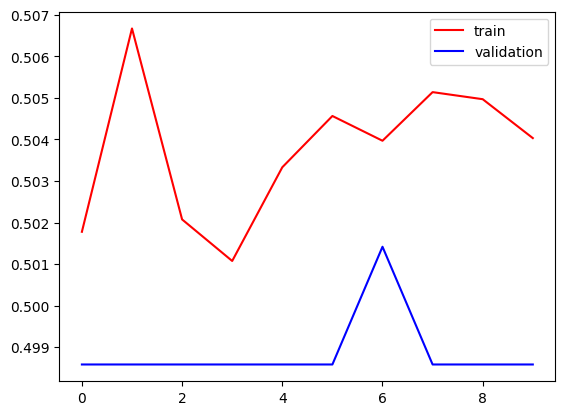

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

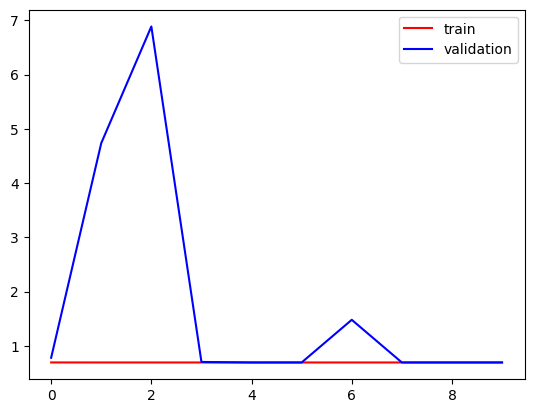

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

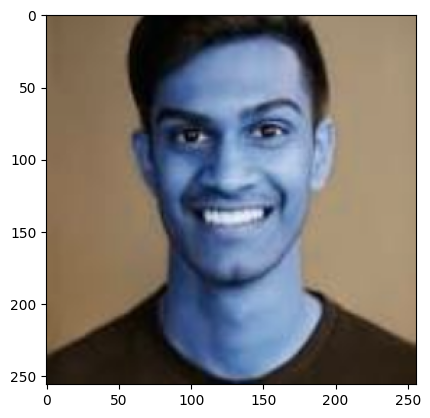

In [ ]:
test_img = cv2.imread('/content/man.jpeg')
test_img = cv2.resize(test_img, (256, 256))
plt.imshow(test_img)

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.50950605]], dtype=float32)

In [ ]:

def classify_gender(output):
    """
    Classifies gender based on the model's prediction.
    Args:
        output (array-like): Model output (probability or class).
    Returns:
        str: "Female" or "Male".
    """
    # Check if the predicted value is >= 0.5 to classify as Male or Female
    if output >= 0.6:
        return "Male"
    else:
        return "Female"

# Example usage:
# Assuming output_arr contains a single prediction value
predicted_gender = classify_gender(output_arr[0][0])  # Access the scalar value
print(f"The predicted gender is: {predicted_gender}")
